# Clustering Data Workflow

In this notebook we will use scikit-learn to look into how to cluster data in a meaningful way.

We will use the Kmeans algorithm and the DBSCAN algorithm.

In [15]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import v_measure_score
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator

We will create our own dataset that looks like two moon patterns that are binarily classified.

We are using this data set to amplify the differences of different clustering algorithms.

In [3]:
X, y = make_moons(n_samples=500, noise=0.1)
df=pd.DataFrame(X,y)
df=df.rename(columns={0: "X1", 1:"X2"})
df.head()

,X1,X2
0,-1.178884,0.331907
1,1.692653,-0.368782
1,0.343537,-0.139906
0,0.690464,0.818981
1,1.465035,-0.463415


Text(0, 0.5, '$x_2$')

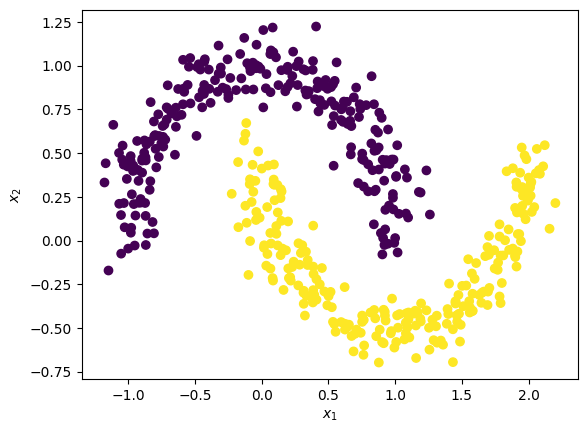

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y, label=y)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

## KMeans

We will first apply the kmeans clustering algorithm to our dataset.

When we try to classify the data points of the two moons in two clusters we see that the way it classifies the points doesnt really capture the essence of the problem.

In [7]:
km = KMeans(
    n_clusters=2, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(X)

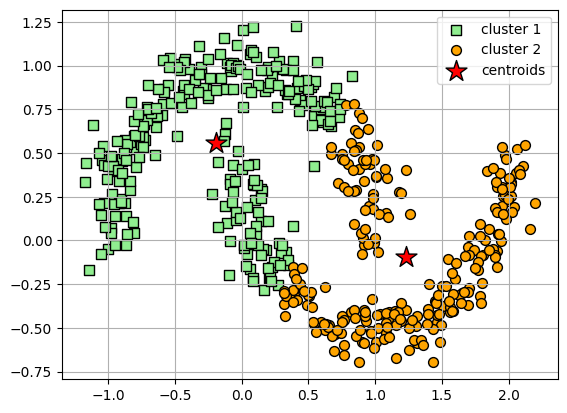

In [8]:
# plot the 3 clusters
plt.scatter(
    X[y_km == 0, 0], X[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X[y_km == 1, 0], X[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)

plt.legend(scatterpoints=1)
plt.grid()
plt.show()

It is possible for us to iterate through different clustering algorithms until we find one that suites our needs.

# DBSCAN

In this case DBSCAN works really well.

Density-Based Spatial Clustering of Applications with Noise.

DBSCAN algorithm is great for detecting clusters that are complex or randomly shaped and sized.

Estimated no. of clusters: 1
Estimated no. of noise points: 0
v_measure = 0.0


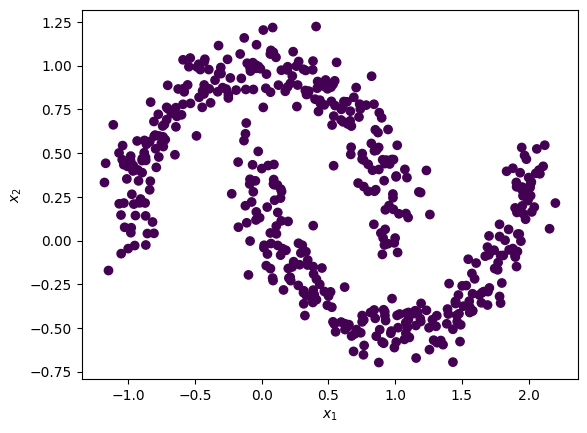

In [9]:
dbscan_cluster1 = DBSCAN()
dbscan_cluster1.fit(X)

# Visualizing DBSCAN
plt.scatter(X[:, 0], 
            X[:, 1], 
            c=dbscan_cluster1.labels_, 
            label=y)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

# Number of Clusters
labels=dbscan_cluster1.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

# Identify Noise
n_noise = list(dbscan_cluster1.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

# Calculating v_measure
print('v_measure =', v_measure_score(y, labels))

We need to change the parameters to create meaningful clusters.

Estimated no. of clusters: 12
Estimated no. of noise points: 108
v_measure = 0.3706425823232596


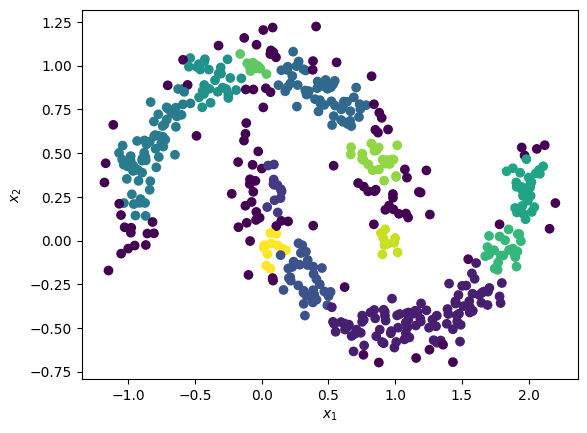

In [10]:
dbscan_cluster = DBSCAN(eps=0.1, min_samples=8)
dbscan_cluster.fit(X)

# Visualizing DBSCAN
plt.scatter(X[:, 0], 
X[:, 1], 
c=dbscan_cluster.labels_, 
label=y)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

# Number of Clusters
labels=dbscan_cluster.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

# Identify Noise
n_noise = list(dbscan_cluster.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

# Calculating v_measure
print('v_measure =', v_measure_score(y, labels))

We need to change the eps an optimal value. 

The Epsilon is the radius of the circle around a data point such that all other data points that fall inside the circle are considered as neighborhood points.

We can use the elbow point detection method.

Text(0, 0.5, 'Distance')

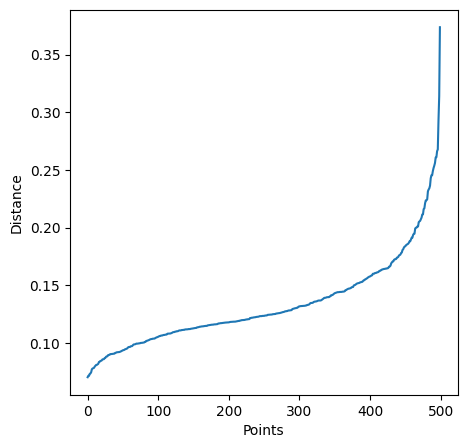

In [12]:
nearest_neighbors = NearestNeighbors(n_neighbors=11)
neighbors = nearest_neighbors.fit(df)

distances, indices = neighbors.kneighbors(df)
distances = np.sort(distances[:,10], axis=0)

fig = plt.figure(figsize=(5, 5))
plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")

0.16910611595278355


<Figure size 500x500 with 0 Axes>

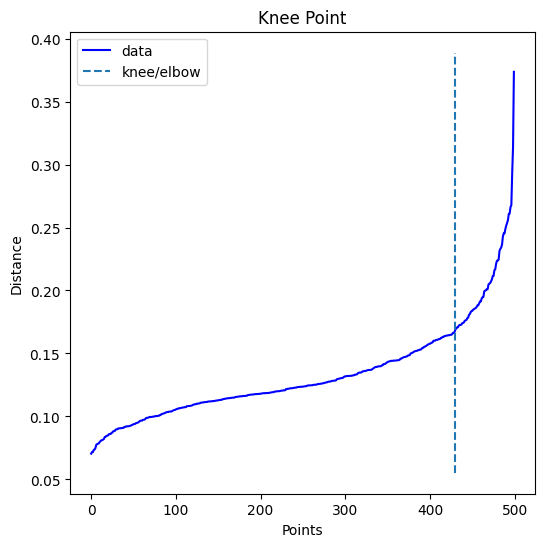

In [16]:
i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')

fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")

print(distances[knee.knee])

Now we can set the eps parameter as the knee.

The resulting clustering makes much more sense and captures the shape of the moons.

Also our v_measure is really high.
This score is a measure between 0–1 that actually quantifies the goodness of the clustering partition. It requires that both homogeneity and completeness are maximised.

Estimated no. of clusters: 2
Estimated no. of noise points: 3
v_measure = 0.9716979906708274


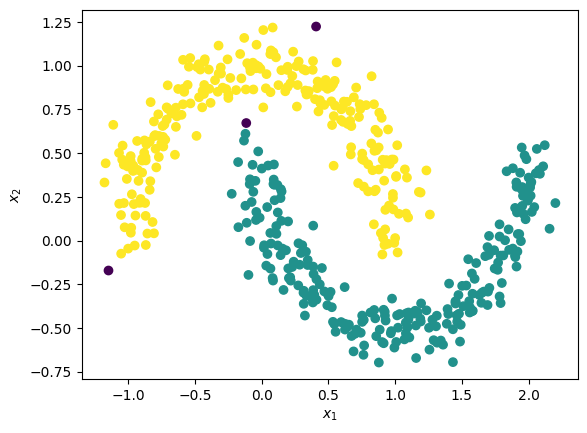

In [17]:
dbscan_cluster = DBSCAN(eps=distances[knee.knee], min_samples=8)
dbscan_cluster.fit(X)

# Visualizing DBSCAN
plt.scatter(X[:, 0], 
X[:, 1], 
c=dbscan_cluster.labels_, 
label=y)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

# Number of Clusters
labels=dbscan_cluster.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

# Identify Noise
n_noise = list(dbscan_cluster.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

# Calculating v_measure
print('v_measure =', v_measure_score(y, labels))